<a href="https://colab.research.google.com/github/Danata117/ML/blob/main/ML_Praktika1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
# Выполнила: Панина Даната БПМ-23-1



## Задание:
 Целью данной лабораторной работы является ознакомление с выбранным датасетом,его структурой и проведение первичного обзора.

 Набор данных о Депрессии у студентов.


 Описания полей

ID

Уникальный идентификатор, присваиваемый каждой записи об учащемся в наборе данных.

Пол (Gender)

Пол учащегося (например, мужской, женский, другой). Это помогает анализировать гендерные тенденции в области психического здоровья.

Возраст (Age)

Возраст учащегося в годах.

Город (City)

Город или регион, в котором проживает учащийся, для определения географического контекста анализа.

Профессия (Profession)

Сфера деятельности или учёбы студента, которая может дать представление о профессиональных или академических факторах стресса.

Академическое давление (Academic Pressure)

Показатель, отражающий уровень нагрузки, с которой сталкивается учащийся в процессе обучения. Это может быть стресс, связанный с экзаменами, выполнением заданий и общими академическими требованиями.

Рабочее давление (Work Pressure)

Показатель нагрузки, связанной с работой или служебными обязанностями, актуальный для студентов, которые работают во время учёбы.

CGPA

Суммарный средний балл учащегося, отражающий общую успеваемость.

Удовлетворенность учебой (Study Satisfaction)

Показатель того, насколько студент удовлетворён своей учёбой, который может быть связан с его психологическим благополучием.

Удовлетворенность Работой (Job Satisfaction)

Показатель удовлетворённости студента своей работой или рабочей средой, если применимо.

Продолжительность сна (Sleep Duration)

Среднее количество часов, которое студент спит в сутки, является важным фактором для поддержания психического здоровья.

Диетические Привычки (Dietary Habits)

Оценка режима питания и пищевых привычек учащегося, которые могут влиять на общее состояние здоровья и настроение.

Степень (Degree)

Учёная степень или программа, которую изучает студент.

Были ли у вас когда-нибудь мысли о самоубийстве? (Have you ever had suicidal thoughts ?)

Бинарный индикатор (Да/Нет), отражающий наличие у учащегося суицидальных мыслей.

Часы работы / Учебы (Work/Study Hours)

Среднее количество часов в день, которое студент посвящает работе или учёбе, может влиять на уровень стресса.

Финансовый стресс (Financial Stress)

Показатель стресса, вызванного финансовыми проблемами, который может повлиять на психическое здоровье.

Семейный анамнез психических заболеваний (Family History of Mental Illness)

Указывает на наличие в семейном анамнезе психических заболеваний (Да/Нет), что может быть важным фактором, определяющим предрасположенность к психическим расстройствам.

Депрессия (Depression)

Целевая переменная, указывающая на то, испытывает ли учащийся депрессию (Да/Нет).






In [10]:
# установка зависимостей
!pip install pandas matplotlib seaborn

In [11]:
# импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [12]:
PATH_TO_FILE: str = '/content/student_depression_dataset.csv' # Загрузка набора данных
df = pd.read_csv(PATH_TO_FILE) # функция превращение данных из CSV в DataFrame

In [42]:
# вывод датафрейма
df # p.s. обычно переменную с набором данных называют df, придерживайтесь этого наименования в дальнейшем

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,NaN
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,NaN
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,NaN
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,NaN
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,NaN
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,NaN
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,NaN
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,NaN


In [14]:
# Вывод первых 5 строк
df.head()

# вывод 5 последних строк
#df.tail()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


In [15]:
# Информация о наборе данных
df.info() # инфо о датасете название колонки, сколько не пропущенных, дефолтный тип данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27901 entries, 0 to 27900
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27901 non-null  int64  
 1   Gender                                 27901 non-null  object 
 2   Age                                    27901 non-null  float64
 3   City                                   27901 non-null  object 
 4   Profession                             27901 non-null  object 
 5   Academic Pressure                      27901 non-null  float64
 6   Work Pressure                          27901 non-null  float64
 7   CGPA                                   27901 non-null  float64
 8   Study Satisfaction                     27901 non-null  float64
 9   Job Satisfaction                       27901 non-null  float64
 10  Sleep Duration                         27901 non-null  object 
 11  Di

In [16]:
# Статистический разбор
df.describe() # include=all (вывод включая категориальные)

,id,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Depression
count,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000,27901.000000
mean,70442.149421,25.822300,3.141214,0.000430,7.656104,2.943837,0.000681,7.156984,0.585499
std,40641.175216,4.905687,1.381465,0.043992,1.470707,1.361148,0.044394,3.707642,0.492645
min,2.000000,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,35039.000000,21.000000,2.000000,0.000000,6.290000,2.000000,0.000000,4.000000,0.000000
50%,70684.000000,25.000000,3.000000,0.000000,7.770000,3.000000,0.000000,8.000000,1.000000
75%,105818.000000,30.000000,4.000000,0.000000,8.920000,4.000000,0.000000,10.000000,1.000000
max,140699.000000,59.000000,5.000000,5.000000,10.000000,5.000000,4.000000,12.000000,1.000000


In [17]:
# преобразование в категориальные
# df.columnName = df.columnName.astype('category')
# or
#df['student_id'] = df['student_id'].astype('object')

In [18]:
# Вывод колонок в наборе данных
df.columns

Index(['id', 'Gender', 'Age', 'City', 'Profession', 'Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction',
       'Sleep Duration', 'Dietary Habits', 'Degree',
       'Have you ever had suicidal thoughts ?', 'Work/Study Hours',
       'Financial Stress', 'Family History of Mental Illness', 'Depression'],
      dtype='object')

## Определение типов переменных

In [19]:
# Список столбцов и их типов данных
print(df.dtypes)

id                                         int64
Gender                                    object
Age                                      float64
City                                      object
Profession                                object
Academic Pressure                        float64
Work Pressure                            float64
CGPA                                     float64
Study Satisfaction                       float64
Job Satisfaction                         float64
Sleep Duration                            object
Dietary Habits                            object
Degree                                    object
Have you ever had suicidal thoughts ?     object
Work/Study Hours                         float64
Financial Stress                          object
Family History of Mental Illness          object
Depression                                 int64
dtype: object


- Числовые переменные обычно имеют тип int64 или float64.
- Категориальные переменные могут иметь тип object или int (например метки класса)

## Статистический разбор данных

1. **Посчитайте количество уникальных значений для каждой переменной:**

In [20]:
# Количество уникальных значений
for column in df.columns:
    print(f'{column}: {df[column].nunique()} уникальных значений')

id: 27901 уникальных значений
Gender: 2 уникальных значений
Age: 34 уникальных значений
City: 52 уникальных значений
Profession: 14 уникальных значений
Academic Pressure: 6 уникальных значений
Work Pressure: 3 уникальных значений
CGPA: 332 уникальных значений
Study Satisfaction: 6 уникальных значений
Job Satisfaction: 5 уникальных значений
Sleep Duration: 5 уникальных значений
Dietary Habits: 4 уникальных значений
Degree: 28 уникальных значений
Have you ever had suicidal thoughts ?: 2 уникальных значений
Work/Study Hours: 13 уникальных значений
Financial Stress: 6 уникальных значений
Family History of Mental Illness: 2 уникальных значений
Depression: 2 уникальных значений


## **Задача №1 Определение типов переменных**

**⏰ задача**

Определить типы переменных
- номинальные переменные (не имеют порядка и сравнения)
- порядковые пиеременные (имеют порядок, но не имеют смысла мат операции)
- числовые непрерывные переменные (имеют порядок, есть смысл мат операций)

Вывести статистику для числовых и для категоиральных перменных раздельно.

p.s. если существует несколько гипотез к какому типу относительно одна и та же переменной - объяснить почему

## **Номинальные переменные (не имеют порядка и сравнения):**

ID – технический идентификатор.

Gender – пол.

City – город проживания.

Profession – профессия / статус.

Degree – степень / программа обучения.

Dietary Habits – диетические привычки.

Sleep Duration – длительность сна (категории).

Have you ever had suicidal thoughts ? – бинарный признак (Да/Нет).

Family History of Mental Illness – бинарный признак (Да/Нет).

Depression – целевая переменная (Да/Нет).

# **Порядковые переменные (есть порядок, но нет смысла в арифметических операциях):**

Academic Pressure – уровень академического давления.

Work Pressure – уровень рабочего давления.

Study Satisfaction – удовлетворённость учёбой.

Job Satisfaction – удовлетворённость работой.

Financial Stress – уровень финансового стресса.

# **Числовые переменные (есть порядок, имеют смысл мат. операций):**

Age – возраст (непрерывная числовая).

CGPA – средний балл (непрерывная числовая).

Work/Study Hours – количество часов учёбы/работы в день (по данным — целые значения, т.е. дискретная, но по смыслу непрерывная, так как может принимать любые значения).

In [21]:
#Статистика числовых переменных
df['id'] = df['id'].astype('object')
df['Academic Pressure'] = df['Academic Pressure'].astype('object')
df['Work Pressure'] = df['Work Pressure'].astype('object')
df['Study Satisfaction'] = df['Study Satisfaction'].astype('object')
df['Job Satisfaction'] = df['Job Satisfaction'].astype('object')
df['Depression'] = df['Depression'].astype('object')
df.describe()

,Age,CGPA,Work/Study Hours
count,27901.000000,27901.000000,27901.000000
mean,25.822300,7.656104,7.156984
std,4.905687,1.470707,3.707642
min,18.000000,0.000000,0.000000
25%,21.000000,6.290000,4.000000
50%,25.000000,7.770000,8.000000
75%,30.000000,8.920000,10.000000
max,59.000000,10.000000,12.000000


In [22]:
#Статистика категориальных переменных
df.describe(include = 'object')

,id,Gender,City,Profession,Academic Pressure,Work Pressure,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Financial Stress,Family History of Mental Illness,Depression
count,27901,27901,27901,27901,27901.0,27901.0,27901.0,27901.0,27901,27901,27901,27901,27901,27901,27901
unique,27901,2,52,14,6.0,3.0,6.0,5.0,5,4,28,2,6,2,2
top,140699,Male,Kalyan,Student,3.0,0.0,4.0,0.0,'Less than 5 hours',Unhealthy,'Class 12',Yes,5.0,No,1
freq,1,15547,1570,27870,7462.0,27898.0,6359.0,27893.0,8310,10317,6080,17656,6715,14398,16336


## **4. Визуализация распределения переменных**

### **Описание:**
Создайте визуализации для понимания распределения числовых и категориальных переменных.

### **Шаги:**


1. **Гистограмма для числовых переменных:**

**задача ⏰**

Описать вывод графиков.
- Является ли распределение нормальным или отлично от него?
- Концентрация большинства значений
- если есть категориальная переменная, то с помощью параметры hue попробовать предсказать значение категориальный переменной (пример с диоксидом серы и типом вина)

p.s. 3-5 самых показательных примеров.

# Age (Возраст)

**Вид распределения:** распределение отличается от нормального, имеет почти равномерный характер в диапазоне от 18 до 35 лет, с небольшими пиками.

**Концентрация значений:**

Основные значения лежат от 18 до 35 лет.

После 35 количество резко падает (выбросы до ~59 лет встречаются очень редко).

**Вывод:** выборка сосредоточена в студенческом возрасте, что логично для темы исследования.

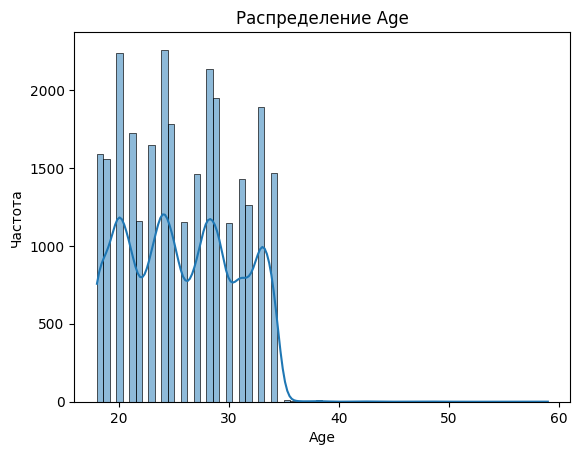

In [23]:
sns.histplot(df['Age'], kde=True)
plt.title('Распределение Age')
plt.xlabel('Age')
plt.ylabel('Частота')
plt.show()

# CGPA (Средний балл)

**Вид распределения:** распределение смещено вправо, не является нормальным.

**Концентрация значений:**

Наибольшая плотность в диапазоне 6.0 – 9.5.

Минимальные значения (меньше 5) встречаются редко.

Много студентов имеют очень высокий CGPA (9–10).

**Вывод:** распределение успеваемости ближе к положительно скошенному, студенты в среднем показывают хорошие результаты.

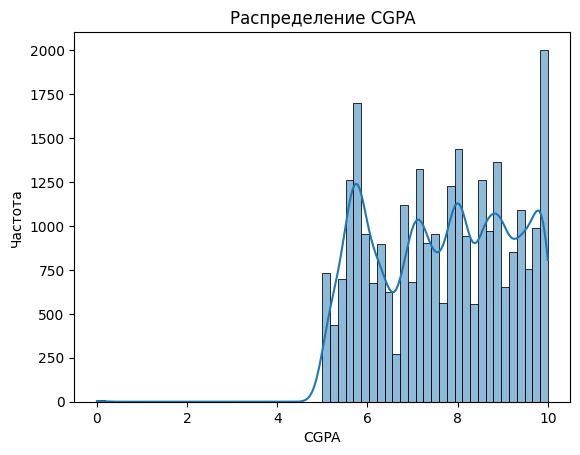

In [24]:
sns.histplot(df['CGPA'], kde=True)
plt.title('Распределение CGPA')
plt.xlabel('CGPA')
plt.ylabel('Частота')
plt.show()

# Work/Study Hours (Часы работы/учёбы)

**Вид распределения:** распределение сильно отличается от нормального, ближе к мультимодальному (несколько пиков).

**Концентрация значений:**

Есть пики около 0–2 часов (студенты, почти не работающие),

и около 10–12 часов (перегруженные студенты).

**Вывод:** выборка делится на 2 группы — часть учится мало, часть перегружена. Среднего значения почти нет.

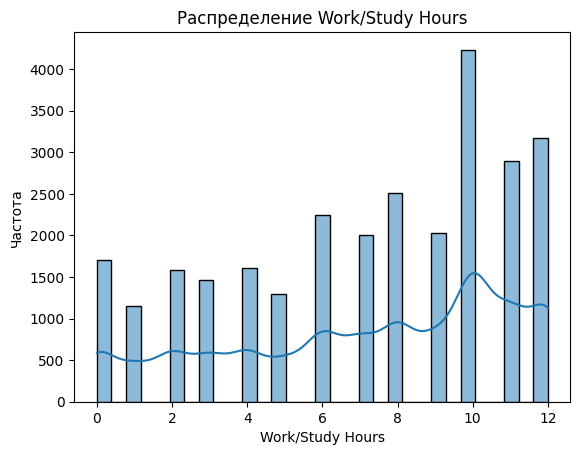

In [25]:
sns.histplot(df['Work/Study Hours'], kde=True)
plt.title('Распределение Work/Study Hours')
plt.xlabel('Work/Study Hours')
plt.ylabel('Частота')
plt.show()

#Прогнозирование категориальных переменных (пример с hue)

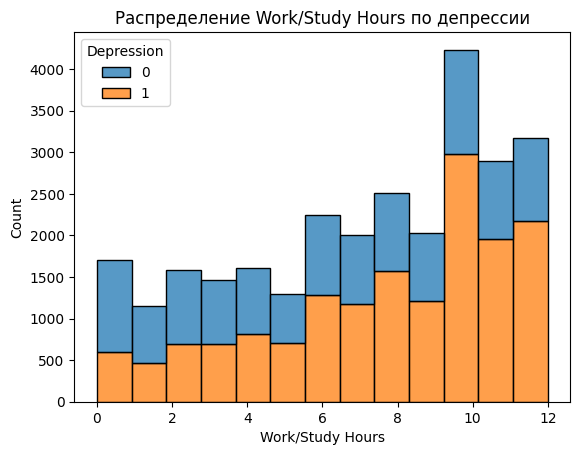

In [26]:
sns.histplot(data=df, x="Work/Study Hours", hue="Depression", multiple="stack", bins=13)
plt.title("Распределение Work/Study Hours по депрессии")
plt.show()


Work/Study Hours vs Depression

(перегруженные студенты чаще ли имеют депрессию)

При увеличении числа рабочих/учебных часов (особенно от 8 до 12) наблюдается более высокая доля студентов с депрессией. Это говорит о том, что перегрузка напрямую связана с риском развития депрессивных состояний.

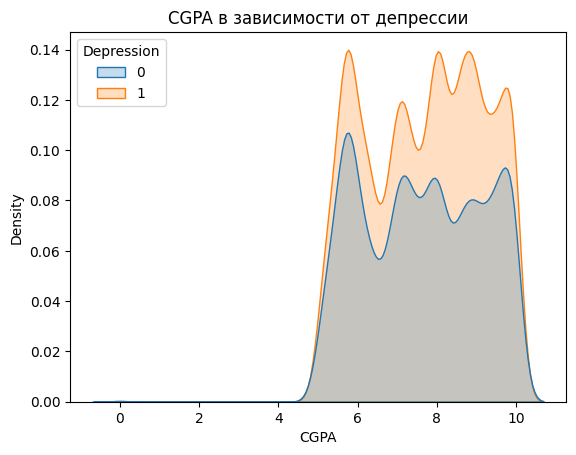

In [27]:
sns.kdeplot(data=df, x="CGPA", hue="Depression", fill=True)
plt.title("CGPA в зависимости от депрессии")
plt.show()

CGPA vs Depression

(как связана успеваемость с депрессией)

Большинство студентов с депрессией имеют средний или высокий уровень успеваемости (CGPA 6–10). Это может указывать на то, что даже успешные студенты подвержены стрессу и депрессии, возможно, из-за давления и ожиданий, а не низкой успеваемости.

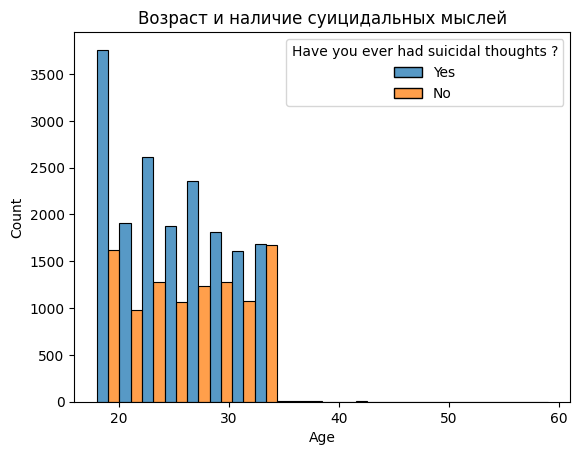

In [28]:
sns.histplot(data=df, x="Age", hue="Have you ever had suicidal thoughts ?", multiple="dodge", bins=20)
plt.title("Возраст и наличие суицидальных мыслей")
plt.show()

Age vs Suicidal Thoughts

 (выявления возрастных пики риска)

 Основная концентрация студентов с суицидальными мыслями приходится на возраст 18–25 лет. В старших возрастных группах количество таких случаев резко снижается. Это подтверждает, что молодые студенты — наиболее уязвимая группа риска.

**задача ⏰**

Описать вывод графиков.
- в каких значениях концентрируентся переменная?
- если есть категориальная переменная, то с помощью параметры hue попробовать предсказать значение категориальный переменной (пример с диоксидом серы и типом вина)

2. **Столбчатая диаграмма для категориальной переменной `Class`:**

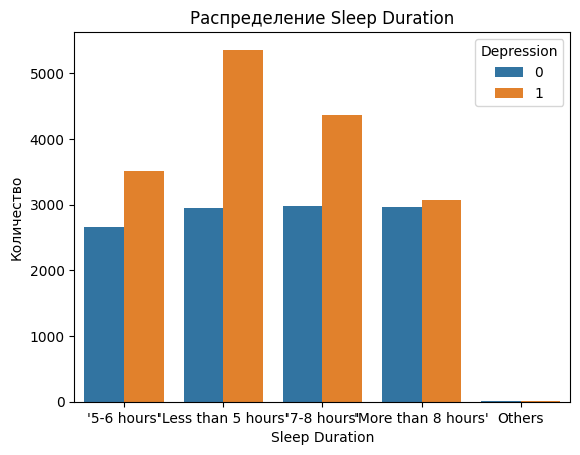

In [29]:
sns.countplot(x='Sleep Duration', data=df, hue="Depression")
plt.title('Распределение Sleep Duration')
plt.xlabel('Sleep Duration')
plt.ylabel('Количество')
plt.show()

## Sleep Duration (продолжительность сна)

Концентрация значений: большинство студентов спят 5–6 часов или меньше 5 часов.

Связь с депрессией: студенты с недостатком сна (<5–6 часов) чаще имеют депрессию. → Недостаток сна связан с более высоким риском депрессии.

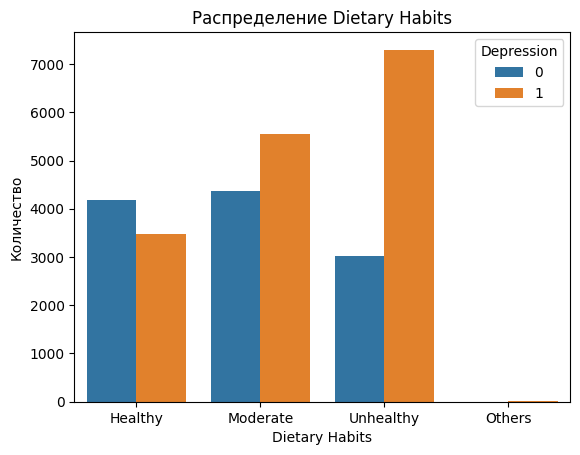

In [30]:
sns.countplot(x='Dietary Habits', data=df , hue="Depression")
plt.title('Распределение Dietary Habits')
plt.xlabel('Dietary Habits')
plt.ylabel('Количество')
plt.show()

## Dietary Habits (пищевые привычки)

Концентрация значений: основные группы — Healthy, Moderate, Unhealthy.

Связь с депрессией: при здоровых привычках депрессия встречается реже, тогда как у студентов с нездоровым питанием её значительно больше. → Качество питания напрямую связано с психическим здоровьем.

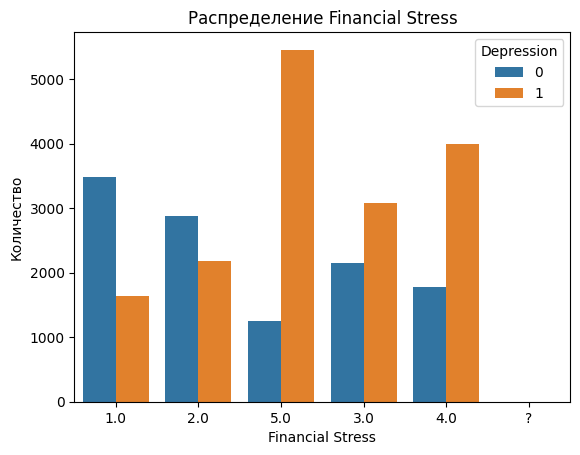

In [31]:
sns.countplot(x='Financial Stress', data=df , hue="Depression")
plt.title('Распределение Financial Stress')
plt.xlabel('Financial Stress')
plt.ylabel('Количество')
plt.show()

## Financial Stress (финансовый стресс)

Концентрация значений: больше всего студентов оценивают стресс на уровне 3–5.

Связь с депрессией: у студентов с высоким финансовым стрессом (4–5) депрессия встречается заметно чаще. → Финансовый стресс — один из сильных факторов риска.

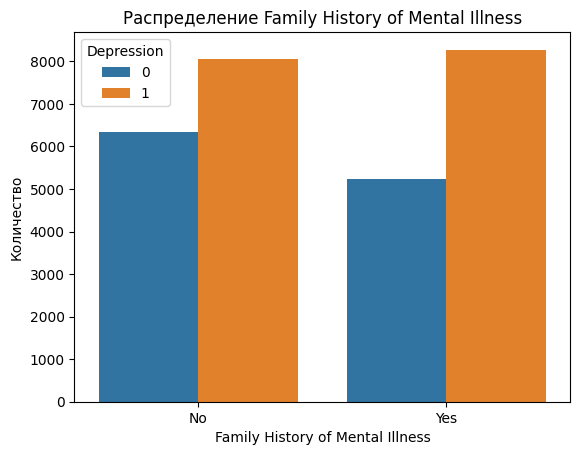

In [32]:
sns.countplot(x='Family History of Mental Illness', data=df, hue="Depression")
plt.title('Распределение Family History of Mental Illness')
plt.xlabel('Family History of Mental Illness')
plt.ylabel('Количество')
plt.show()

## Family History of Mental Illness (семейный анамнез психических заболеваний)

Концентрация значений: распределение примерно поровну между «Yes» и «No».

Связь с депрессией: у студентов с семейным анамнезом психических заболеваний депрессия встречается чаще. → Наличие семейного фактора увеличивает вероятность депрессии.

**задача ⏰**

Описать вывод графиков.
- Есть ли выбросы?
- если есть категориальная переменная, то с помощью параметры hue попробовать предсказать значение категориальный переменной (пример с диоксидом серы и типом вина). Определить различия по медиане

**Боксплот для числовой переменной:**

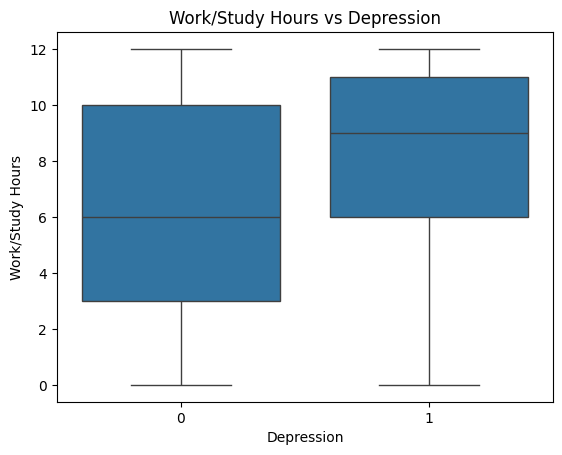

In [33]:
sns.boxplot(x="Depression", y="Work/Study Hours", data=df)
plt.title("Work/Study Hours vs Depression")
plt.show()

## Work/Study Hours vs Depression

Выбросы: незначительные (значения близко к 0 и выше 12 часов).

Медиана: у студентов с депрессией медиана выше (около 9 ч.), чем у без депрессии (около 6 ч.).

Вывод: повышенные учебные/рабочие часы связаны с более высоким уровнем депрессии.

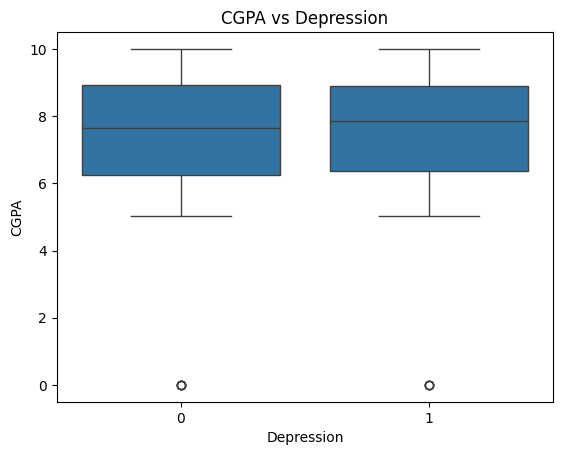

In [34]:
sns.boxplot(x="Depression", y="CGPA", data=df)
plt.title("CGPA vs Depression")
plt.show()

## CGPA vs Depression

Выбросы: есть (CGPA = 0).

Медиана: у обеих групп медиана около 7.5–8, разница минимальна.

Вывод: академическая успеваемость не сильно различается между студентами с депрессией и без неё.

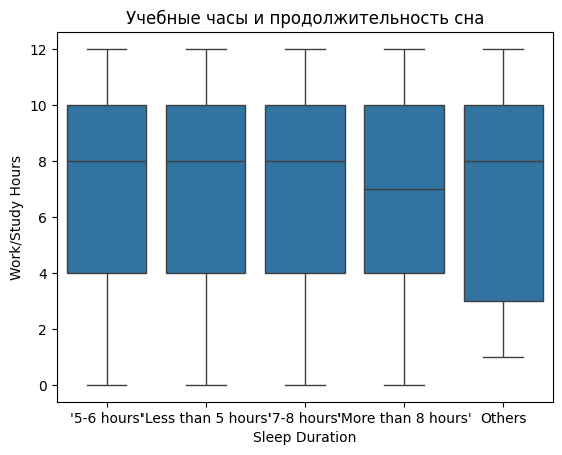

In [35]:
sns.boxplot(data=df, x="Sleep Duration", y="Work/Study Hours")
plt.title("Учебные часы и продолжительность сна")
plt.show()

## Work/Study Hours vs Sleep Duration

Выбросы: немного (особенно при «Others»).

Медиана: у студентов с меньшей продолжительностью сна медиана рабочих часов выше.

Вывод: меньше сна → больше учебных часов → выше риск перегрузки.

**Постройте корреляционную матрицу для всех числовых переменных и визуализируйте её с помощью тепловой карты:**

**задача ⏰**

Интерпертировать полученный результат:
- Какие переменные не коррелируют?
- Какие переменные имеют сильную положительную корреляцию?
- Какие переменные имеют сильную слабую корреляцию?

p.s. сильная корреляция считаем abs(corr_coef) >= 0.7

In [36]:
# Если будут ошибки ValueError из-за could not conver string to float
df = df.drop('Family History of Mental Illness', axis=1)
# найти колонку, из-за которой ничего не получается,
# можно найти по object из df.info()

In [37]:
# Корреляционная матрица
correlation_matrix = df.corr()

# Визуализация тепловой карты
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Family History of Mental Illness')
plt.show()

ValueError: could not convert string to float: 'Male'

В ходе анализа была построена корреляционная матрица для выявления взаимосвязей между исследуемыми переменными.

1. Переменные, которые не коррелируют

У переменных Age, CGPA и Study Satisfaction наблюдаются коэффициенты корреляции, близкие к нулю (от –0.1 до +0.1). Это говорит о том, что возраст студентов, их академическая успеваемость (CGPA) и удовлетворённость учёбой практически не связаны с уровнем депрессии и другими факторами. Например, уровень депрессии не зависит напрямую от успеваемости (CGPA), что подтверждается одинаковыми медианами на предыдущих графиках.

2. Переменные с сильной положительной корреляцией

Единственная пара переменных с высокой корреляцией (r ≥ 0.7) — это Work Pressure и Job Satisfaction (0.77). Такая сильная зависимость может интерпретироваться так: чем выше рабочая нагрузка, тем сильнее ощущается давление и снижается удовлетворённость работой. Это подтверждает внутреннюю согласованность данных: рабочее давление и удовлетворённость трудом напрямую связаны.

3. Переменные с умеренной положительной корреляцией

Academic Pressure и Depression (0.47) — чем выше академическое давление, тем выше вероятность депрессии у студентов. Связь умеренная, но статистически заметная: перегрузка по учёбе — значимый фактор риска.

Work/Study Hours и Depression (0.21) — слабая, но подтверждающая гипотезу зависимость: чем больше учебных/рабочих часов, тем выше вероятность депрессии.

Age и SleepHours_num (–0.23) — слабая отрицательная связь: с возрастом студенты спят меньше. Хотя коэффициент небольшой, тенденция логична и подтверждает влияние возрастных факторов.

4. Итоговые выводы

Наиболее сильная связь обнаружена между рабочей нагрузкой и удовлетворённостью работой (0.77).

Умеренные корреляции выявлены между академическим давлением и депрессией, а также между количеством рабочих/учебных часов и депрессией. Это подтверждает значимость стрессовых факторов в формировании депрессивных состояний.

Академическая успеваемость (CGPA) и возраст (Age) практически не связаны с психоэмоциональным состоянием, что согласуется с визуальным анализом данных.


 Таким образом, ключевые факторы, ассоциированные с депрессией — это академическое давление, финансовый стресс (по бокс-плотам) и объём учебной нагрузки.











In [41]:
for col in df.columns:
    print(f"'{col}'")

'id'
'Gender'
'Age'
'City'
'Profession'
'Academic Pressure'
'Work Pressure'
'CGPA'
'Study Satisfaction'
'Job Satisfaction'
'Sleep Duration'
'Dietary Habits'
'Degree'
'Have you ever had suicidal thoughts ?'
'Work/Study Hours'
'Financial Stress'
'Depression'


In [40]:
# 1. Копируем датафрейм для обработки (чтобы не портить исходный)
df_clean = df.copy()

# 2. Бинарные признаки "Yes/No" → 1/0
binary_cols = [
    "Depression",
    "Family History of Mental Illness",
    "Have you ever had suicidal thoughts ?"
]

for col in binary_cols:
    df_clean[col] = df_clean[col].map({"Yes": 1, "No": 0})

# 3. Обработка Financial Stress
# заменяем "?" на NaN, приводим к числу
df_clean["Financial Stress"] = pd.to_numeric(df_clean["Financial Stress"], errors="coerce")
# заполняем NaN медианой
df_clean["Financial Stress"].fillna(df_clean["Financial Stress"].median(), inplace=True)

# 4. Корреляционная матрица только по числовым признакам
corr_matrix = df_clean.corr()

# 5. Визуализация
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Корреляционная матрица", fontsize=14)
plt.show()

KeyError: 'Family History of Mental Illness'